In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

cust_filter = data['cust_id'] == 'klant_266'
data = data.where(cust_filter).dropna()

data['procesdag']=pd.to_datetime(data['procesdag'])
data.set_index('procesdag', inplace=True)
data = data['2017-03-01': '2017-04-01']

data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2017-03-01,klant_266,22.0,17.0,train
2017-03-02,klant_266,17.0,16.0,train
2017-03-03,klant_266,16.0,0.0,train
2017-03-04,klant_266,0.0,0.0,train
2017-03-05,klant_266,0.0,60.0,train


In [86]:
data.head()

,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
procesdag,,,,
2017-03-01,klant_266,22.0,17.0,train
2017-03-02,klant_266,17.0,16.0,train
2017-03-03,klant_266,16.0,0.0,train
2017-03-04,klant_266,0.0,0.0,train
2017-03-05,klant_266,0.0,60.0,train


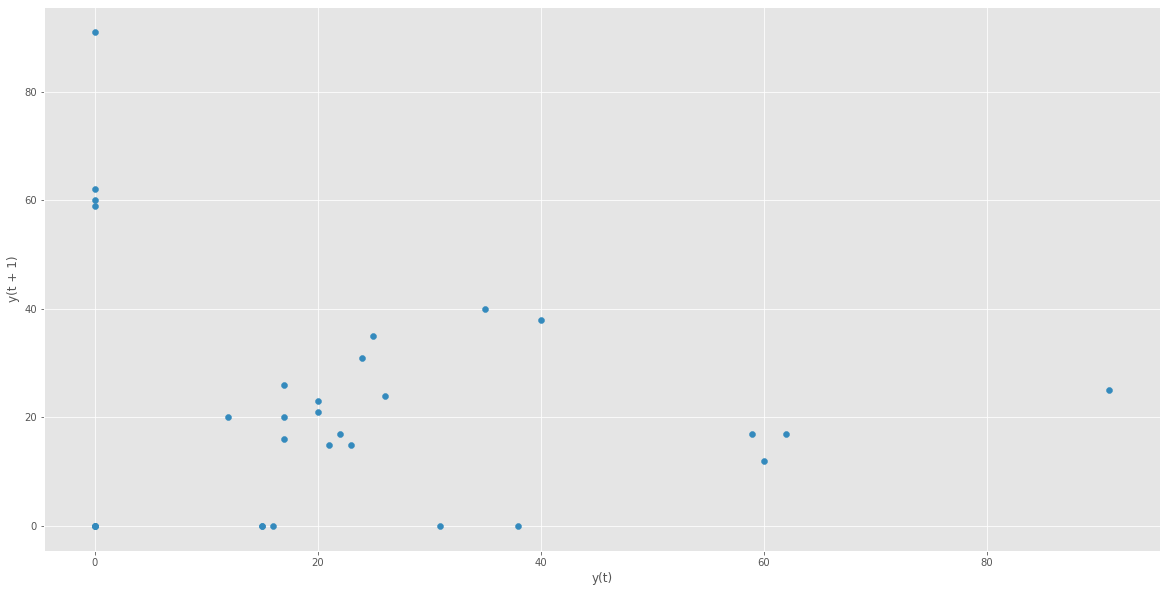

In [87]:
pd.plotting.lag_plot(data['aantal_pakketten'])

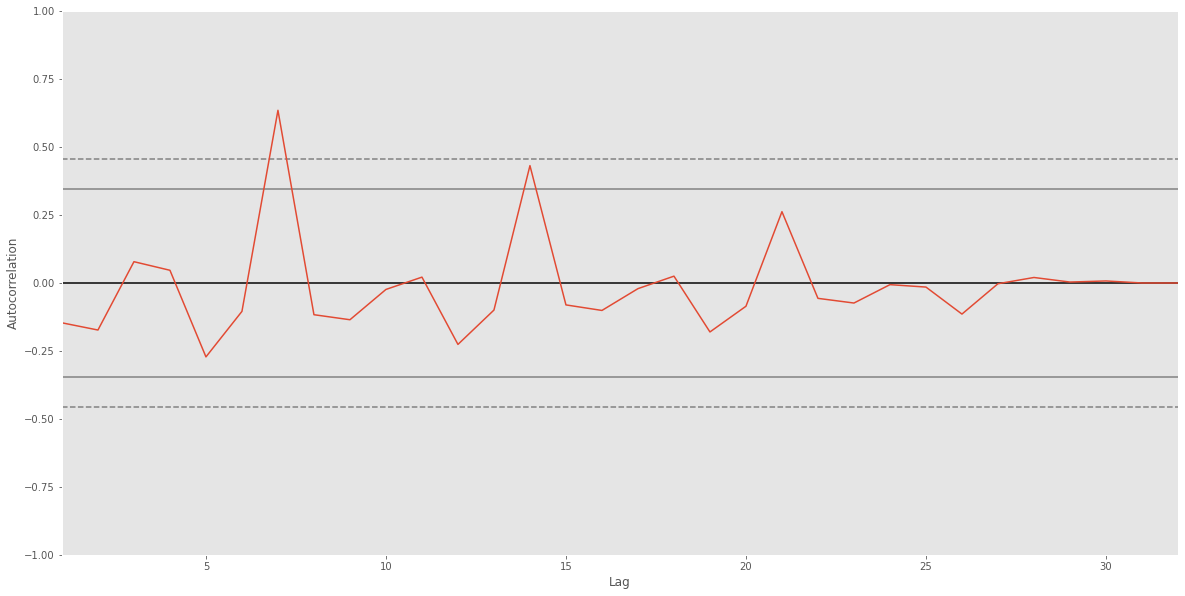

In [88]:
pd.plotting.autocorrelation_plot(data['aantal_pakketten'])

In [89]:
data['aantal_pakketten'].corr(data['aantal_pakketten'].shift(7))

0.9575996544383114

In [90]:
data['stationary'] = data['aantal_pakketten'].diff()
data['stationary']

procesdag
2017-03-01     NaN
2017-03-02    -5.0
2017-03-03    -1.0
2017-03-04   -16.0
2017-03-05     0.0
2017-03-06    60.0
2017-03-07   -48.0
2017-03-08     8.0
2017-03-09     3.0
2017-03-10    -8.0
2017-03-11   -15.0
2017-03-12     0.0
2017-03-13    59.0
2017-03-14   -42.0
2017-03-15     3.0
2017-03-16     1.0
2017-03-17    -6.0
2017-03-18   -15.0
2017-03-19     0.0
2017-03-20    62.0
2017-03-21   -45.0
2017-03-22     9.0
2017-03-23    -2.0
2017-03-24     7.0
2017-03-25   -31.0
2017-03-26     0.0
2017-03-27    91.0
2017-03-28   -66.0
2017-03-29    10.0
2017-03-30     5.0
2017-03-31    -2.0
2017-04-01   -38.0
Name: stationary, dtype: float64

In [91]:
from statsmodels.tsa.ar_model import AR

# Train/Test datasets
X = data['stationary'].dropna()
train_data = X[:-7]
test_data = X[-7:]

In [92]:
data.shape

(32, 5)

In [93]:
train_data.shape

(24,)

In [94]:
test_data.shape

(7,)

In [95]:
train_data

procesdag
2017-03-02    -5.0
2017-03-03    -1.0
2017-03-04   -16.0
2017-03-05     0.0
2017-03-06    60.0
2017-03-07   -48.0
2017-03-08     8.0
2017-03-09     3.0
2017-03-10    -8.0
2017-03-11   -15.0
2017-03-12     0.0
2017-03-13    59.0
2017-03-14   -42.0
2017-03-15     3.0
2017-03-16     1.0
2017-03-17    -6.0
2017-03-18   -15.0
2017-03-19     0.0
2017-03-20    62.0
2017-03-21   -45.0
2017-03-22     9.0
2017-03-23    -2.0
2017-03-24     7.0
2017-03-25   -31.0
Name: stationary, dtype: float64

In [96]:
test_data

procesdag
2017-03-26     0.0
2017-03-27    91.0
2017-03-28   -66.0
2017-03-29    10.0
2017-03-30     5.0
2017-03-31    -2.0
2017-04-01   -38.0
Name: stationary, dtype: float64

In [97]:
# Train AR model
model = AR(train_data)
model_fitted = model.fit()

#import warnings
#warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWa

In [98]:
print('The lag value chose is: %s' % model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 8
The coefficients of the model are:
 const            0.744615
L1.stationary   -0.931781
L2.stationary   -0.033822
L3.stationary   -0.097410
L4.stationary   -0.048911
L5.stationary   -0.103883
L6.stationary   -0.092003
L7.stationary    0.918937
L8.stationary    0.878313
dtype: float64


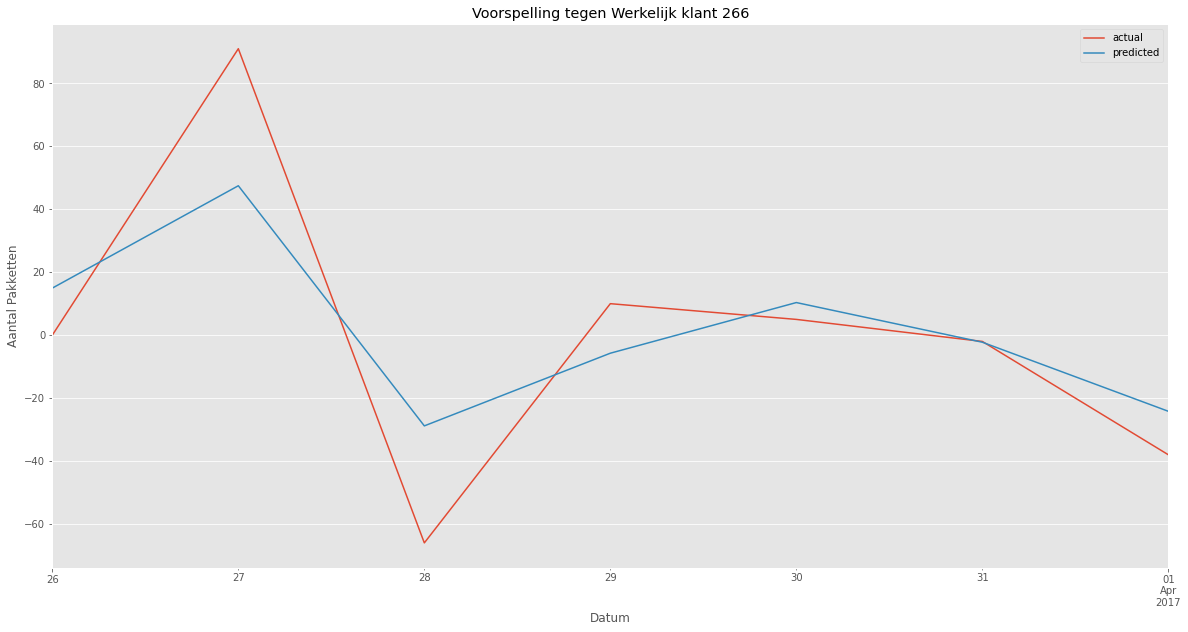

In [99]:
# make predictions
predictions = model_fitted.predict(
    start=len(train_data),
    end=len(train_data) + len(test_data)-1,
    dynamic=False)

# create comparison dataframe
compare_data = pd.concat([data['stationary'].tail(7), predictions], axis=1).rename(columns={'stationary':'actual', 0:'predicted'})
compare_data.plot(
ylabel = 'Aantal Pakketten',
xlabel = 'Datum',
title = 'Voorspelling tegen Werkelijk klant 266')

In [100]:
compare_data

,actual,predicted
2017-03-26,0.0,14.943515
2017-03-27,91.0,47.464265
2017-03-28,-66.0,-28.826781
2017-03-29,10.0,-5.736719
2017-03-30,5.0,10.353878
2017-03-31,-2.0,-2.246786
2017-04-01,-38.0,-24.187722


In [101]:
diff = compare_data.actual - compare_data.predicted

Text(0, 0.5, '$\\hat{y}$')

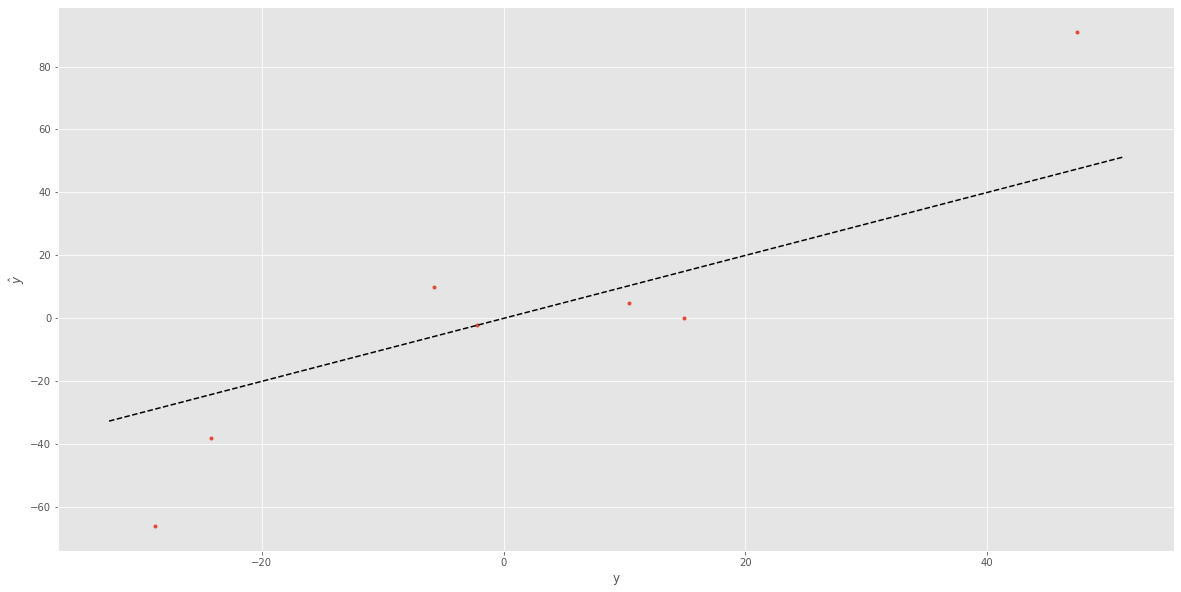

In [102]:
plt.plot(compare_data.predicted, compare_data.actual, ".")
plt.plot(plt.xlim(), plt.xlim(), ls="--", c='black')
plt.xlabel("y")
plt.ylabel("$\hat{y}$")

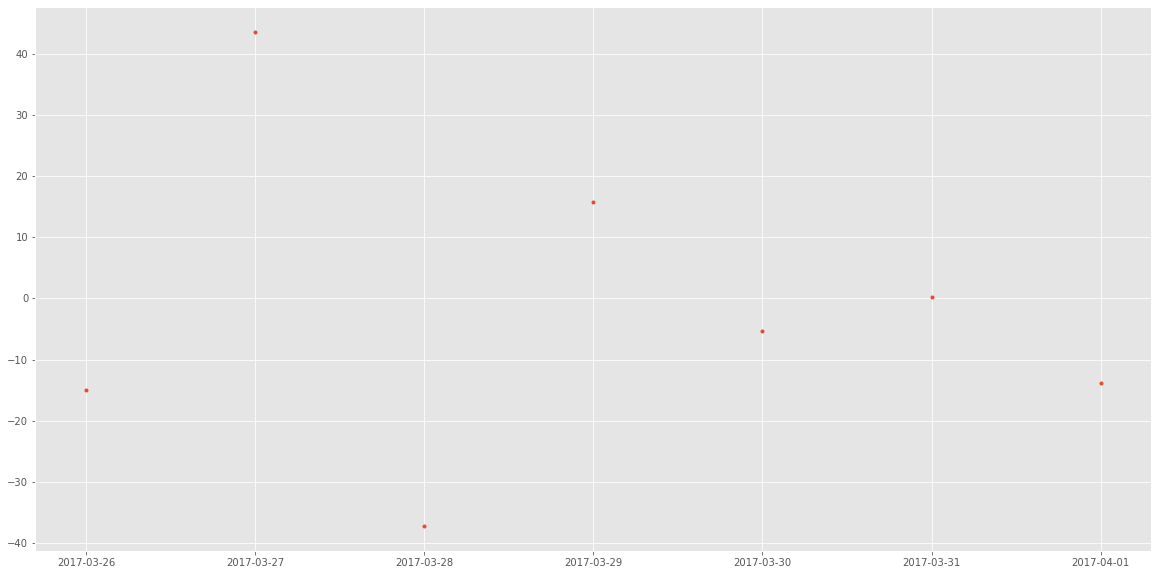

In [103]:
plt.plot(diff, ".")

(array([1., 0., 2., 1., 1., 0., 1., 0., 0., 1.]),
 array([-37.17321931, -29.10232389, -21.03142847, -12.96053305,
         -4.88963764,   3.18125778,  11.2521532 ,  19.32304862,
         27.39394404,  35.46483946,  43.53573488]),
 <a list of 10 Patch objects>)

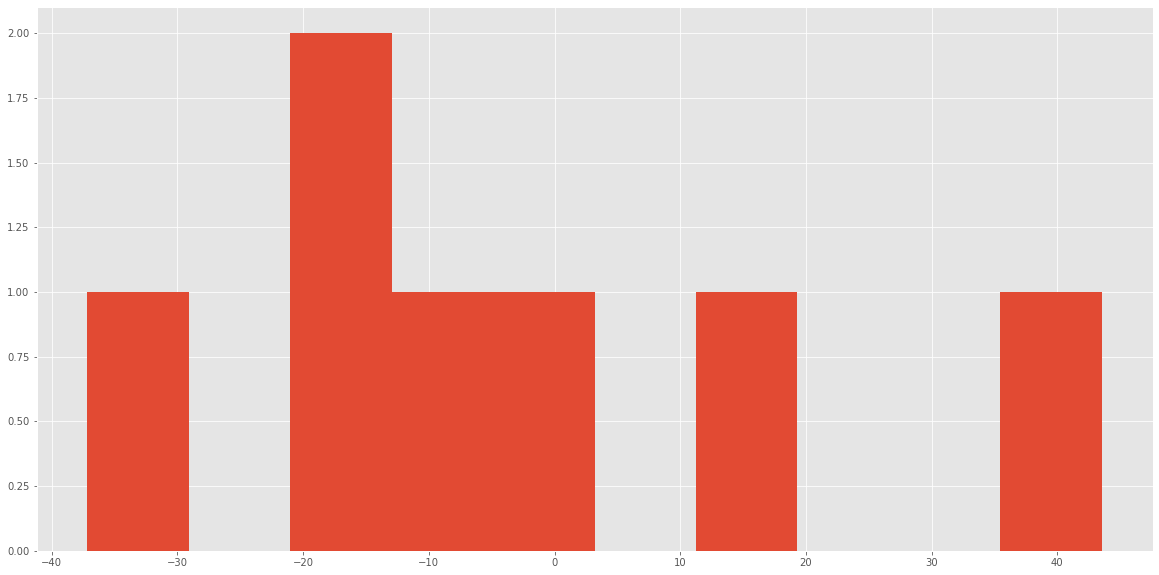

In [104]:
plt.hist(diff)